# HW2 - CSE 519
Name: Piyush Shyam Banginwar

SBU ID: 110944214

E-mail: pbanginwar@cs.stonybrok.edu


## Preprocessing and Data Cleanup

In [55]:
#Importing all necessary pkgs
import pandas as pd
import numpy as np
import math
import scipy.stats as sct
import matplotlib.pyplot as plt; plt.rcdefaults()
import operator
import random
%matplotlib inline

#'country-data.csv' has been modified by replacing 'unknown', 'NA' values by 'NaN'
df = pd.read_csv('country-data.csv', ',')

#replacing NaN values with mean of the columns
for x in df:
    if df[str(x)].dtype != "object":
        # 'np.nanmean' finds mean by ignoring NaN values, we then replace NaN values with the result
        mean = np.nanmean(df[str(x)])
        for i,y in enumerate(df[str(x)]):
            if y=='nan' or y=="nan" or math.isnan(y):
                df[str(x)][i] = mean

#Defining some useful terms which can be used later 
gdp_per_capita = df.GDP/df.Population
population_density = df.Population/df.Area
labor_force_ratio = df.Labor_Force/df.Population
internet_users_ratio = df.Internet_Users/df.Population

/home/piyush/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Q1 : Informative Plots

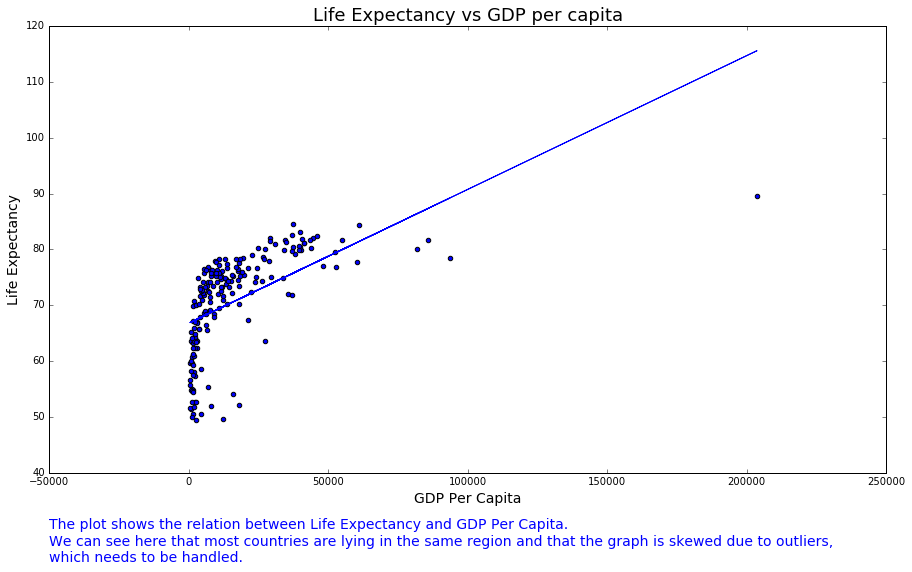

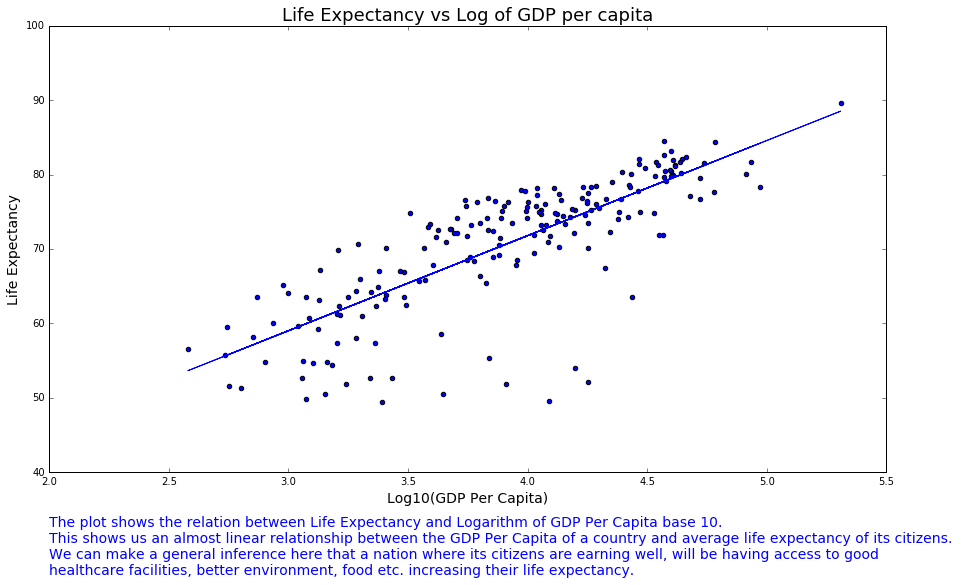

In [56]:
# 1. Scatter Plots
#Plotting a scatter plot between GDP Per Capita and Life Expectancy along with a best fit line
plt.figure(figsize=(15, 8))
plt.scatter(gdp_per_capita, df.Life_Expectancy)
plt.plot(gdp_per_capita, np.poly1d(np.polyfit(gdp_per_capita, df.Life_Expectancy, 1))(gdp_per_capita))
plt.ylabel('Life Expectancy', {'fontsize':14})
plt.xlabel('GDP Per Capita', {'fontsize':14})
plt.title('Life Expectancy vs GDP per capita', {'fontsize':18})
description = "The plot shows the relation between Life Expectancy and GDP Per Capita. \nWe can see here that most countries are lying in the same region and that the graph is skewed due to outliers, \nwhich needs to be handled."
plt.annotate(description, xy=(0, -0.2), size=14, xycoords='axes fraction', color='blue')
plt.show()

#Avoiding outliers for the above by taking logarithm base 10 values
gdp_list = np.log10(gdp_per_capita)
plt.figure(figsize=(15, 8))
plt.scatter(gdp_list, df.Life_Expectancy)
plt.plot(gdp_list, np.poly1d(np.polyfit(gdp_list, df.Life_Expectancy, 1))(gdp_list))
plt.ylabel('Life Expectancy', {'fontsize':14})
plt.xlabel('Log10(GDP Per Capita)', {'fontsize':14})
plt.title('Life Expectancy vs Log of GDP per capita', {'fontsize':18})
description = "The plot shows the relation between Life Expectancy and Logarithm of GDP Per Capita base 10. \nThis shows us an almost linear relationship between the GDP Per Capita of a country and average life expectancy of its citizens. \nWe can make a general inference here that a nation where its citizens are earning well, will be having access to good \nhealthcare facilities, better environment, food etc. increasing their life expectancy."
plt.annotate(description, xy=(0, -0.23), size=14, xycoords='axes fraction', color='blue')
plt.show()

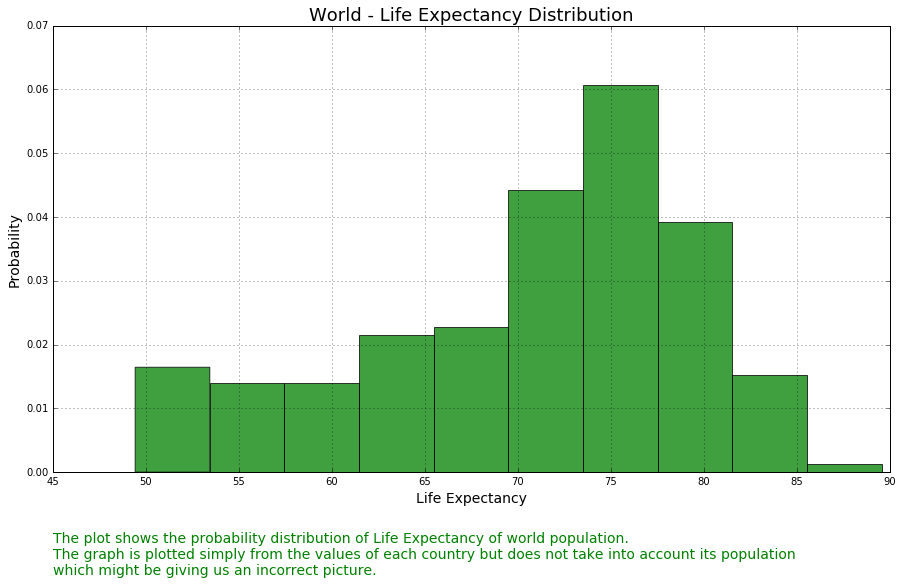

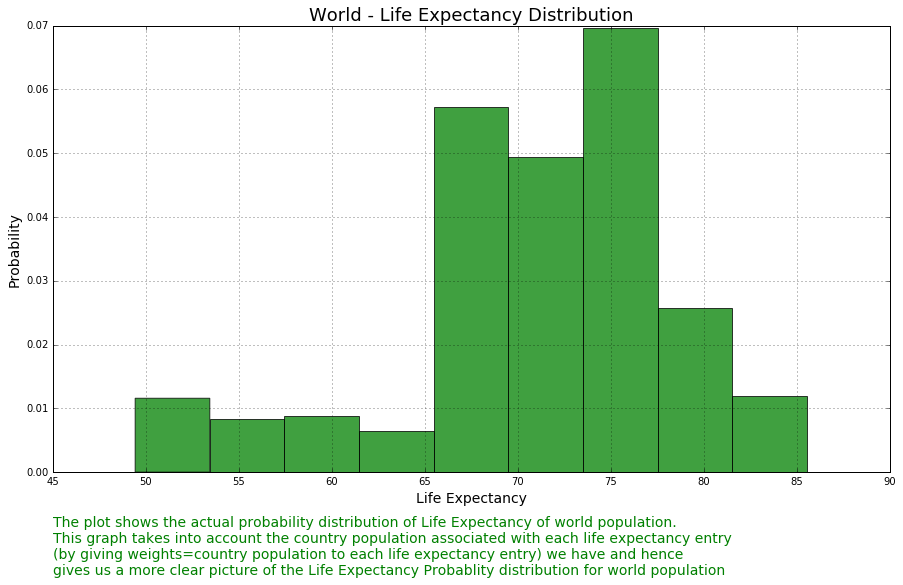

In [57]:
# 2. Histogram

#Plotting a histogram for distribution of Life Expectancy of Countries
plt.figure(figsize=(15, 8))
n, bins, patches = plt.hist([df.Life_Expectancy], 10, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Life Expectancy', {'fontsize':14})
plt.ylabel('Probability', {'fontsize':14})
plt.title('World - Life Expectancy Distribution', {'fontsize':18})
description = "The plot shows the probability distribution of Life Expectancy of world population. \nThe graph is plotted simply from the values of each country but does not take into account its population \nwhich might be giving us an incorrect picture."
plt.annotate(description, xy=(0, -0.23), size=14, xycoords='axes fraction', color='green')
plt.grid(True)
plt.show()

#Plotting a histogram for distribution of Life Expectancy of Countries weighted by country populations
plt.figure(figsize=(15, 8))
n, bins, patches = plt.hist([df.Life_Expectancy], 10, normed=1, weights = [df.Population], facecolor='green', alpha=0.75)
plt.xlabel('Life Expectancy', {'fontsize':14})
plt.ylabel('Probability', {'fontsize':14})
plt.title('World - Life Expectancy Distribution', {'fontsize':18})
description = "The plot shows the actual probability distribution of Life Expectancy of world population. \nThis graph takes into account the country population associated with each life expectancy entry\n(by giving weights=country population to each life expectancy entry) we have and hence \ngives us a more clear picture of the Life Expectancy Probablity distribution for world population"
plt.annotate(description, xy=(0, -0.23), size=14, xycoords='axes fraction', color='green')
plt.grid(True)
plt.show()

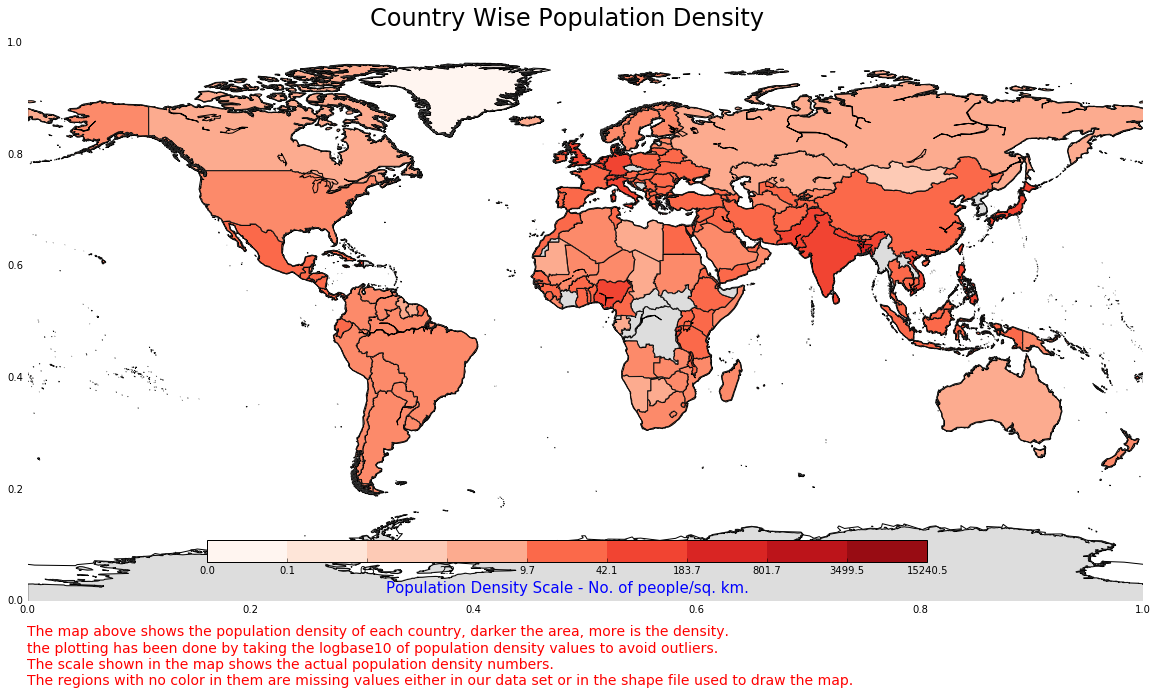

In [58]:
# 3. Data Map:

"""
References taken from:
http://ramiro.org/notebook/basemap-choropleth/
http://matplotlib.org/basemap/
http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
"""
import matplotlib as mp
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#Scaling down to avoid outliers in population density
values = np.log10(population_density)

#Creating a color map scheme to be used for plotting in map
num_colors = 10
cm = plt.get_cmap('Reds')
scheme = [cm(1.*i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1

#Creating the map
map = Basemap(lon_0=0)
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Country Wise Population Density', fontsize=24, y=.95)
description = "The map above shows the population density of each country, darker the area, more is the density.\nthe plotting has been done by taking the logbase10 of population density values to avoid outliers.\nThe scale shown in the map shows the actual population density numbers.\nThe regions with no color in them are missing values either in our data set or in the shape file used to draw the map."
plt.annotate(description, xy=(0.0, -0.15), size=14, xycoords='axes fraction', color='red')
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
map.drawcoastlines()
map.drawmapboundary(color='w')
shapefile = 'mapshape/ne_10m_admin_0_countries_1'
map.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)

for info, shape in zip(map.units_info, map.units):
    name = info['NAME']
    if name not in df.Name.values:
        color = '#dddddd'
    else:
        row = df.loc[df['Name'] == name]
        index = row.values[0][21]
        color = scheme[index]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Draw color legend.
ax_legend = fig.add_axes([0.25, 0.18, 0.5, 0.03], zorder=3)
cmap = mp.colors.ListedColormap(scheme)
cb = mp.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(pow(10,round(i, 3)),1)) for i in bins])
cb.ax.set_xlabel('Population Density Scale - No. of people/sq. km.', {'fontsize':15}, color='blue')

## Q2: Pearson Correlation Analysis

In [59]:
#Pearson coefficient calculation
import json
import random
coeff_list = []
for x in df:
    for y in df:
        if x != y and df[str(x)].dtype != "object" and df[str(y)].dtype != object:
            #print sct.pearsonr(df[str(x)],df[str(y)]), " between", x, " and ", y
            value = sct.pearsonr(df[str(x)],df[str(y)])
            coeff_list.append((value[0], value[1], x, y))

answer = []
answer.append(coeff_list[coeff_list.index(min(coeff_list, key=operator.itemgetter(0)))])
answer.append(coeff_list[coeff_list.index(max(coeff_list, key=operator.itemgetter(0)))])

jsonData = {
    "Email": "pbanginwar@cs.stonybrook.edu",
    "Name": "Piyush Shyam Banginwar",
    "Q2": {
        "Negative": {
            "Attr0": answer[0][3],
            "Attr1": answer[0][2],
            "coeff": round(answer[0][0],4),
            "pValue": answer[0][1]
        },
        "Positive": {
            "Attr0": answer[1][3],
            "Attr1": answer[1][2],
            "coeff": round(answer[1][0],4),
            "pValue": answer[1][1]
        }
    },
    "SBUID": "110944214"
}

# Writing JSON data into a file called HW2.json
with open('HW2.json', 'w') as f:
     json.dump(jsonData, f)
        


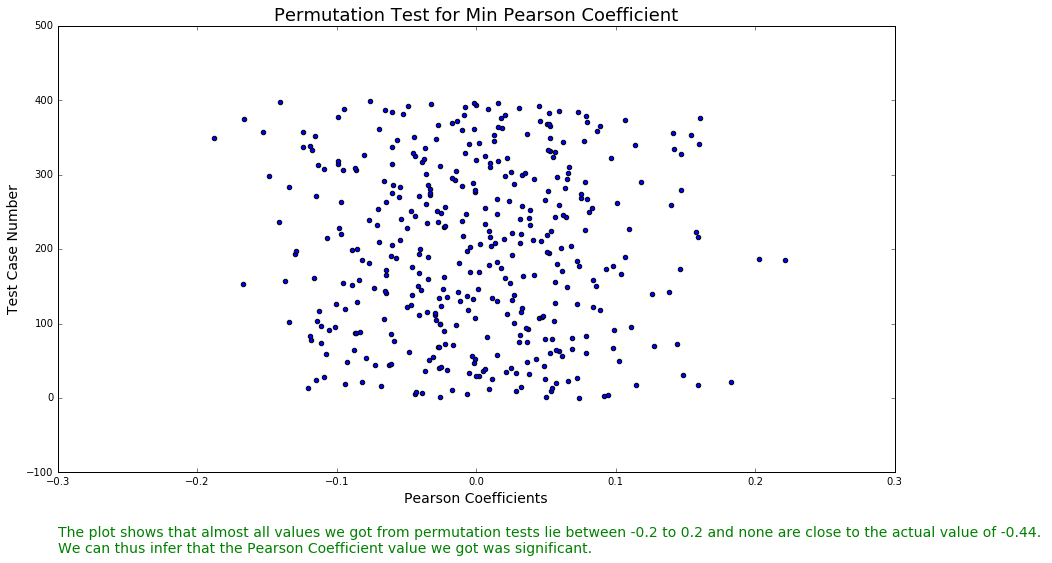

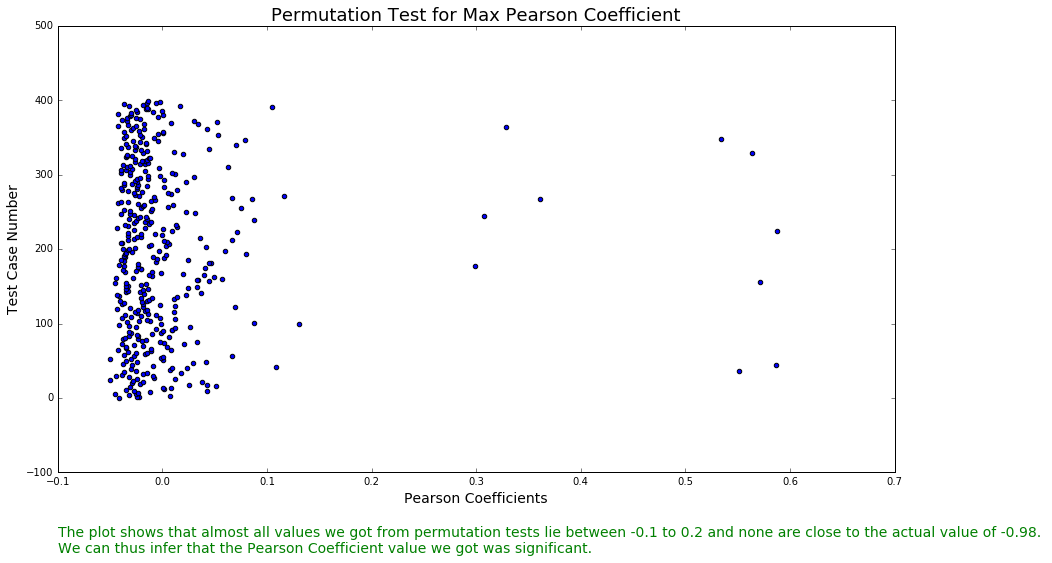

In [60]:
#Permutation Test

#1. For Min coefficient value
coeff_list_random_min = [[],[]]
for i in range(400):
    random_list = pd.DataFrame({'A':df[str(answer[0][3])].copy()})
    random_list.apply(random.shuffle, axis=0)
    value = sct.pearsonr(random_list.A,df[str(answer[0][2])])
    coeff_list_random_min[0].append(value[0])
    coeff_list_random_min[1].append(value[1])

y_pos = np.arange(0,400)
plt.figure(figsize=(15, 8))
plt.xlabel('Pearson Coefficients', {'fontsize':14})
plt.ylabel('Test Case Number', {'fontsize':14})
plt.title('Permutation Test for Min Pearson Coefficient', {'fontsize':18})
description = "The plot shows that almost all values we got from permutation tests lie between -0.2 to 0.2 and none are close to the actual value of -0.44. \nWe can thus infer that the Pearson Coefficient value we got was significant."
plt.annotate(description, xy=(0, -0.18), size=14, xycoords='axes fraction', color='green')
plt.scatter(coeff_list_random_min[0], y_pos)
plt.show()

#2. For Max coefficient value
coeff_list_random_max = [[],[]]
for i in range(400):
    random_list = pd.DataFrame({'A':df[str(answer[1][3])].copy()})
    random_list.apply(random.shuffle, axis=0)
    value = sct.pearsonr(random_list.A,df[str(answer[1][2])])
    coeff_list_random_max[0].append(value[0])
    coeff_list_random_max[1].append(value[1])

y_pos = np.arange(0,400)
plt.figure(figsize=(15, 8))
plt.xlabel('Pearson Coefficients', {'fontsize':14})
plt.ylabel('Test Case Number', {'fontsize':14})
plt.title('Permutation Test for Max Pearson Coefficient', {'fontsize':18})
description = "The plot shows that almost all values we got from permutation tests lie between -0.1 to 0.2 and none are close to the actual value of -0.98. \nWe can thus infer that the Pearson Coefficient value we got was significant."
plt.annotate(description, xy=(0, -0.18), size=14, xycoords='axes fraction', color='green')
plt.scatter(coeff_list_random_max[0], y_pos)
plt.show()

## Q3: Linear Regression Model

The country most above the forecast is: Monaco
The country most below the forecast is: Solomon Islands


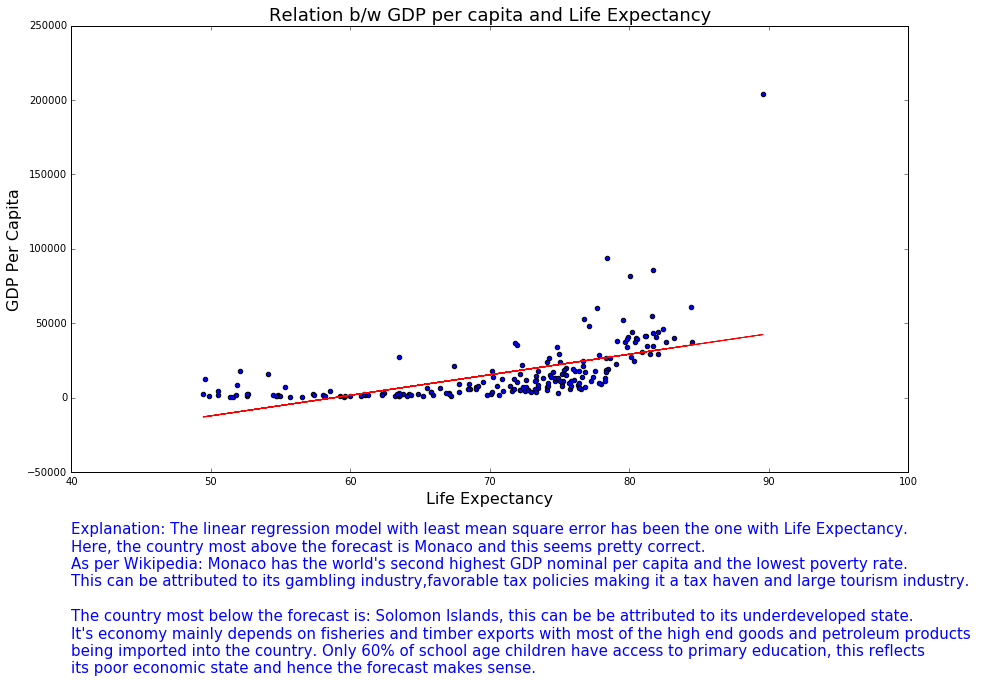

In [61]:
#Linear Regression Model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

coeff_list = []
for x in df:
    if df[str(x)].dtype != "object":
        (a,b) = np.polyfit(df[str(x)], gdp_per_capita, deg=1)
        err =  np.sqrt(mean_squared_error(np.polyval([a,b], df[str(x)]), gdp_per_capita))
        coeff_list.append((a, b, err, x))
answer = []
answer.append(coeff_list[coeff_list.index(min(coeff_list, key=operator.itemgetter(2)))])
answer.append(coeff_list[coeff_list.index(max(coeff_list, key=operator.itemgetter(2)))])

a = answer[0][0]
b = answer[0][1]
x = answer[0][3]
min_error_regr_list = np.polyval([a,b], df[str(x)])
forecast_diff = gdp_per_capita - min_error_regr_list
mostAbove = df.Name[forecast_diff.argmax()]
mostBelow = df.Name[forecast_diff.argmin()]

print "The country most above the forecast is:", mostAbove
print "The country most below the forecast is:", mostBelow

#Write the answer to JSON file
a_dict = {
    "Q3": {
        "Attr": answer[0][3],
        "SquaredError": round(answer[0][2],4),
        "TCMostAboveForecast": mostAbove,
        "TCMostBelowForecast": mostBelow
    }}
with open('HW2.json') as f:
    data = json.load(f)
data.update(a_dict)
with open('HW2.json', 'w') as f:
    json.dump(data, f)

plt.figure(figsize=(15, 8))
description = """Explanation: The linear regression model with least mean square error has been the one with Life Expectancy. \nHere, the country most above the forecast is Monaco and this seems pretty correct. \nAs per Wikipedia: Monaco has the world's second highest GDP nominal per capita and the lowest poverty rate.\nThis can be attributed to its gambling industry,favorable tax policies making it a tax haven and large tourism industry.\n
The country most below the forecast is: Solomon Islands, this can be be attributed to its underdeveloped state.\nIt's economy mainly depends on fisheries and timber exports with most of the high end goods and petroleum products \nbeing imported into the country. Only 60% of school age children have access to primary education, this reflects \nits poor economic state and hence the forecast makes sense."""
plt.annotate(description, xy=(0, -0.45), size=15, xycoords='axes fraction',color='blue')
plt.xlabel('Life Expectancy', {'fontsize':16})
plt.ylabel('GDP Per Capita', {'fontsize':16})
plt.title('Relation b/w GDP per capita and Life Expectancy', {'fontsize':18})
plt.plot(df.Life_Expectancy, a * df.Life_Expectancy + b, color='red')
plt.scatter(df.Life_Expectancy, gdp_per_capita)

## Q4: Ranking/Scoring Function

Highest Rank:  Monaco
Lowest Rank:  South Sudan


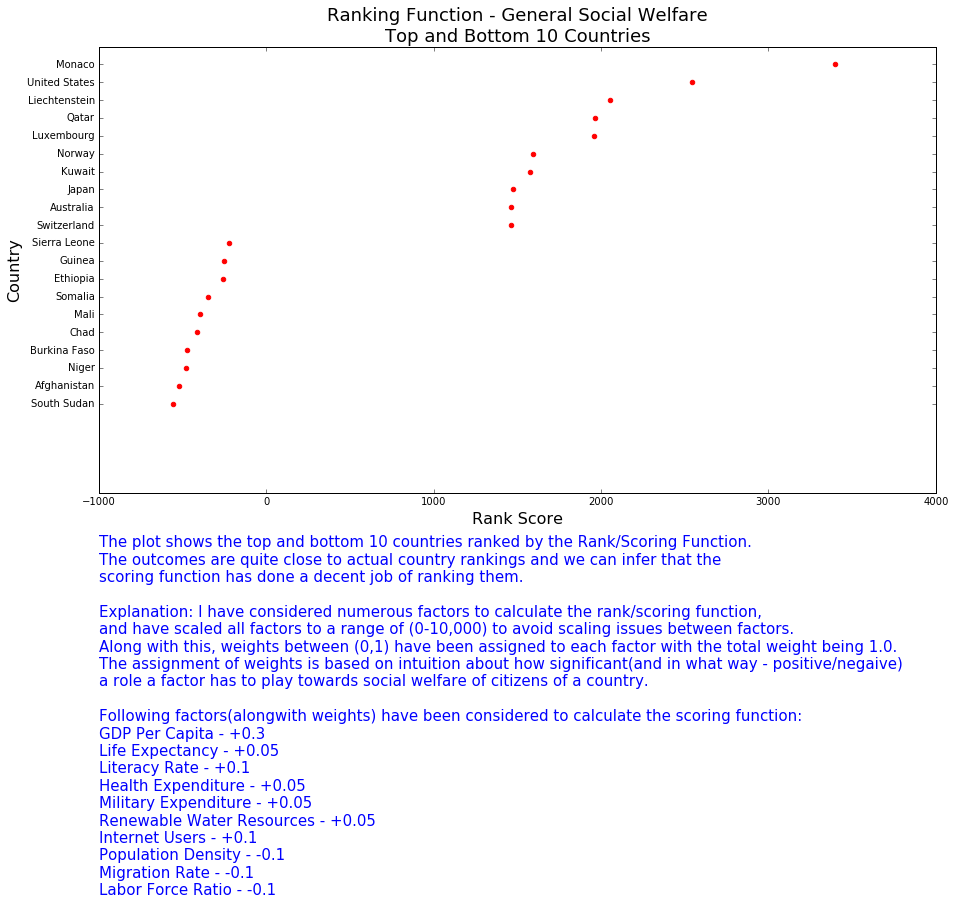

In [62]:
#Reference: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html

#Scaling all variables to a range of (0,cap), where cap = 10000
#This is done by: X_std = (X - X.min) / (X.max - X.min)
#                 X_scaled = X_std * (max - min) + min
#Using an API referred above to do the computation
cap = 10000
gdp_per_capita_scaled = preprocessing.minmax_scale(gdp_per_capita, (0,cap))
population_density_scaled = preprocessing.minmax_scale(population_density, (0,cap))
life_expectancy_scaled = preprocessing.minmax_scale(df.Life_Expectancy, (0,cap))
literacy_rate_scaled = preprocessing.minmax_scale(df.Literacy_Rate, (0,cap))
renewable_water_ratio_scaled = preprocessing.minmax_scale(df.Renewable_Water_Resources/df.Area, (0,cap))
labor_force_ratio_scaled = preprocessing.minmax_scale(labor_force_ratio, (0,cap))
internet_users_ratio_scaled = preprocessing.minmax_scale(internet_users_ratio, (0,cap))
migration_rate_scaled = preprocessing.minmax_scale(df.Net_Migration_Rate, (0,cap))

#The values in Health Expenditure/GDP, Military Expenditure/GDP is the percentage of GDP spent on Health and Military
# where, the actual values are:
actual_health_expenditure = df.Health_Expenditure * df.GDP / 100
actual_military_expenditure = df.Military_Expenditure * df.GDP / 100
health_expenditure_scaled = preprocessing.minmax_scale(actual_health_expenditure, (0,cap))
military_expenditure_scaled = preprocessing.minmax_scale(actual_military_expenditure, (0,cap))

rank = (((0.3) * gdp_per_capita_scaled) + 
        ((0.05) * life_expectancy_scaled) +
        ((0.1) * literacy_rate_scaled) +
        ((0.05) * health_expenditure_scaled) +
        ((0.05) * military_expenditure_scaled) +
        ((0.05) * renewable_water_ratio_scaled) +
        ((0.1) * internet_users_ratio_scaled) +
       ((-0.1) * population_density_scaled) +
       ((-0.1) * migration_rate_scaled) +
       ((-0.1) * labor_force_ratio_scaled))

mostAbove = df.Name[rank.argmax()]
mostBelow = df.Name[rank.argmin()]
print "Highest Rank: ",mostAbove
print "Lowest Rank: ",mostBelow

#lets create a list of bottom and top 10 countries and plot them
new_list = pd.DataFrame({'A':rank,'B':df.Name})
sorted_new_list = new_list.sort_values(by='A',axis=0)
rank_list = [[],[]]
i=0
for index, row in sorted_new_list.iterrows():
    if i<10:
        #print row['B']
        rank_list[0].append(row['A'])
        rank_list[1].append(row['B'])
    if i>186:
        rank_list[0].append(row['A'])
        rank_list[1].append(row['B'])
    i+=1

#x_pos = np.arange(0,len(df.Name))
x_pos = np.arange(0,len(rank_list[1]))
plt.figure(figsize=(15, 8))
description = """The plot shows the top and bottom 10 countries ranked by the Rank/Scoring Function. \nThe outcomes are quite close to actual country rankings and we can infer that the \nscoring function has done a decent job of ranking them.\n
Explanation: I have considered numerous factors to calculate the rank/scoring function, \nand have scaled all factors to a range of (0-10,000) to avoid scaling issues between factors.\nAlong with this, weights between (0,1) have been assigned to each factor with the total weight being 1.0.
The assignment of weights is based on intuition about how significant(and in what way - positive/negaive) \na role a factor has to play towards social welfare of citizens of a country.\n
Following factors(alongwith weights) have been considered to calculate the scoring function:
GDP Per Capita - +0.3\nLife Expectancy - +0.05\nLiteracy Rate - +0.1\nHealth Expenditure - +0.05\nMilitary Expenditure - +0.05\nRenewable Water Resources - +0.05\nInternet Users - +0.1\nPopulation Density - -0.1\nMigration Rate - -0.1\nLabor Force Ratio - -0.1"""
plt.annotate(description, xy=(0, -0.90), size=15, xycoords='axes fraction',color='blue')
plt.xlabel('Rank Score', {'fontsize':16})
plt.ylabel('Country', {'fontsize':16})
plt.title('Ranking Function - General Social Welfare\nTop and Bottom 10 Countries', {'fontsize':18})
plt.scatter(rank_list[0],x_pos, color='red')
plt.yticks(x_pos, rank_list[1])
plt.show()

## Q5: Distance Function

In [63]:
#Using the Rank calculated in earlier question to calcualte the distance between two countries.
# Logic used: Distance(a,b) = absolute difference between ranks of a & b.
#Where ranks will be normalized before usage.

#Normalizing ranks computed earlier
rank_normalized = preprocessing.normalize(rank)

#Distance Function
def distance(x,y):
    return abs(rankFn(x) - rankFn(y))
def rankFn(x):
    return rank_normalized[0][df.Name.tolist().index(x)]

distance_answer = []
for x in df.Name:
    distance_matrix = []
    for y in df.Name:
        if x != y:
            #print x,y
            distance_val = distance(x,y)
            distance_matrix.append((distance_val, x, y))
    distance_answer.append((x, distance_matrix[distance_matrix.index(min(distance_matrix, key=operator.itemgetter(0)))][2], distance_matrix[distance_matrix.index(max(distance_matrix, key=operator.itemgetter(0)))][2]))

print "Using the Rank calculated in earlier question to calcualte the distance between two countries.\nLogic used: Distance(a,b) = absolute difference between ranks of a & b.\nWhere ranks will be normalized before usage."
print "\nTable Format:\n'Country Name' 'Nearest Country' 'Farthest Country'"
print np.asarray(distance_answer)

/home/piyush/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Using the Rank calculated in earlier question to calcualte the distance between two countries.
Logic used: Distance(a,b) = absolute difference between ranks of a & b.
Where ranks will be normalized before usage.

Table Format:
'Country Name' 'Nearest Country' 'Farthest Country'
[['Afghanistan' 'South Sudan' 'Monaco']
 ['Albania' 'Montenegro' 'Monaco']
 ['Algeria' 'Nicaragua' 'Monaco']
 ['Andorra' 'France' 'Monaco']
 ['Angola' 'Eritrea' 'Monaco']
 ['Antigua and Barbuda' 'Cyprus' 'Monaco']
 ['Argentina' 'Hungary' 'Monaco']
 ['Armenia' 'Bosnia and Herzegovina' 'Monaco']
 ['Australia' 'Switzerland' 'South Sudan']
 ['Austria' 'Iceland' 'Monaco']
 ['Azerbaijan' 'Bosnia and Herzegovina' 'Monaco']
 ['Bahamas, The' 'Czech Republic' 'Monaco']
 ['Bahrain' 'Belarus' 'Monaco']
 ['Bangladesh' 'Togo' 'Monaco']
 ['Barbados' 'Chile' 'Monaco']
 ['Belarus' 'Bahrain' 'Monaco']
 ['Belgium' 'Ireland' 'Monaco']
 ['Belize' 'Botswana' 'Monaco']
 ['Benin' 'Sierra Leone' 'Monaco']
 ['Bhutan' 'Rwanda' 'Monaco']
 